In [52]:
#!pip install PyPDF2 transformers
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import PyPDF2
from transformers import pipeline

In [ ]:
def extract_text_from_pdf(pdf_file):
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

pdf_file = "/content/MachineTranslationwithAttention.pdf"
pdf_text = extract_text_from_pdf(pdf_file)
print(pdf_text[:1000])


See discussions, st ats, and author pr ofiles f or this public ation at : https://www .researchgate.ne t/public ation/355917108
Neu ral Machine T ranslation with Attention
Technic al R eport  · August 2021
DOI: 10.13140/RG.2.2.29381.37607/1
CITATION
1READS
5,946
2 author s:
Mohammad W asil Saleem
Univ ersität P otsdam
4 PUBLICA TIONS    2 CITATIONS    
SEE PROFILE
Sandeep Upr ety
Univ ersität P otsdam
1 PUBLICA TION    1 CITATION    
SEE PROFILE
All c ontent f ollo wing this p age was uplo aded b y Sandeep Upr ety on 05 No vember 2021.
The user has r equest ed enhanc ement of the do wnlo aded file.Neural Machine Translation with Attention
Mohammad Wasil Saleem
Matrikel-Nr.: 805779
Universit ¨at Potsdam
saleem1@uni-potsdam.deSandeep Uprety
Matrikel-Nr. 804982
Universit ¨at Potsdam
uprety@uni-potsdam.de
Abstract
In recent years, the success achieved
through neural machine translation has
made it mainstream in machine translation
systems. In this work, encoder-decoder
with attention syste

In [21]:
summarization_pipeline = pipeline("summarization", model="facebook/bart-large-cnn")
prompt=pdf_text

max_length = summarization_pipeline.model.config.max_position_embeddings
prompt = prompt[:max_length]

summary = summarization_pipeline(prompt, max_length=100, min_length=30, do_sample=False)[0]['summary_text']
print("Summary of the Prompt (Extracted Features):\n", summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Summary of the Prompt (Extracted Features):
 Neural Machine Translation with AttentionTechnic al R eport  · August 2021DOI: 10.13140/RG.2.29381.37607/1CITATION: 1READS5,9462 author: Mohammad Wasil Saleem.


In [ ]:
import pandas as pd
import numpy as np

In [40]:
dataset=pd.read_csv('/content/database.csv')

In [41]:
dataset.head()

,Unnamed: 0,Id,title,link,year,authors,citations,abstract
0,0,0,Bargaining Game Based Time Scheduling Scheme f...,/document/9615057/,2021,['Sungwook Kim'],0,Backscatter communications have been acknowled...
1,1,1,The Use of Tangible User Interfaces in K12 Edu...,/document/9721879/,2022,"['José A. Gallud', 'Ricardo Tesoriero', 'Maria...",0,Tangible User Interfaces have enriched and exp...
2,2,2,Transient Surface Charge Characteristics of DC...,/document/9714376/,2022,"['Xiaolong Li', 'Songling Han', 'Mingde Wan', ...",0,The insulator in direct current gas-insulated ...
3,3,3,Electromagnetic Vibration Characteristics Anal...,/document/8918234/,2019,"['Defeng Kong', 'Zhijun Shuai', 'Wanyou Li', '...",3,Electromagnetic vibration is an important exci...
4,4,4,kNN-STUFF: kNN STreaming Unit for Fpgas,/document/8911384/,2019,"['João Vieira', 'Rui P. Duarte', 'Horácio C. N...",11,This paper presents kNN STreaming Unit For Fpg...


In [42]:
dataset.shape

(601, 8)

In [43]:
dataset.isnull().sum()

,0
Unnamed: 0,0
Id,0
title,0
link,0
year,0
authors,0
citations,0
abstract,50


In [44]:
print(dataset.columns)

Index(['Unnamed: 0', 'Id', 'title', 'link', 'year', 'authors', 'citations',
       'abstract'],
      dtype='object')


In [45]:
columns_to_drop = ['Unnamed: 0', 'Id', 'citations']

dataset.drop(columns=columns_to_drop, inplace=True)

In [46]:
dataset.head()

,title,link,year,authors,abstract
0,Bargaining Game Based Time Scheduling Scheme f...,/document/9615057/,2021,['Sungwook Kim'],Backscatter communications have been acknowled...
1,The Use of Tangible User Interfaces in K12 Edu...,/document/9721879/,2022,"['José A. Gallud', 'Ricardo Tesoriero', 'Maria...",Tangible User Interfaces have enriched and exp...
2,Transient Surface Charge Characteristics of DC...,/document/9714376/,2022,"['Xiaolong Li', 'Songling Han', 'Mingde Wan', ...",The insulator in direct current gas-insulated ...
3,Electromagnetic Vibration Characteristics Anal...,/document/8918234/,2019,"['Defeng Kong', 'Zhijun Shuai', 'Wanyou Li', '...",Electromagnetic vibration is an important exci...
4,kNN-STUFF: kNN STreaming Unit for Fpgas,/document/8911384/,2019,"['João Vieira', 'Rui P. Duarte', 'Horácio C. N...",This paper presents kNN STreaming Unit For Fpg...


In [48]:
import re

In [49]:
def clean_author(text):
    return re.sub(r"[\[\]\(\)]", "", text)
dataset['authors'] = dataset['authors'].apply(clean_author)

In [50]:
dataset.head()

,title,link,year,authors,abstract
0,Bargaining Game Based Time Scheduling Scheme f...,/document/9615057/,2021,'Sungwook Kim',Backscatter communications have been acknowled...
1,The Use of Tangible User Interfaces in K12 Edu...,/document/9721879/,2022,"'José A. Gallud', 'Ricardo Tesoriero', 'Maria ...",Tangible User Interfaces have enriched and exp...
2,Transient Surface Charge Characteristics of DC...,/document/9714376/,2022,"'Xiaolong Li', 'Songling Han', 'Mingde Wan', '...",The insulator in direct current gas-insulated ...
3,Electromagnetic Vibration Characteristics Anal...,/document/8918234/,2019,"'Defeng Kong', 'Zhijun Shuai', 'Wanyou Li', 'D...",Electromagnetic vibration is an important exci...
4,kNN-STUFF: kNN STreaming Unit for Fpgas,/document/8911384/,2019,"'João Vieira', 'Rui P. Duarte', 'Horácio C. Neto'",This paper presents kNN STreaming Unit For Fpg...


In [53]:
import neattext.functions as nxt

In [54]:
dataset['title']=dataset['title'].apply(nxt.remove_stopwords)

In [55]:
dataset.head()

,title,link,year,authors,abstract
0,Bargaining Game Based Time Scheduling Scheme A...,/document/9615057/,2021,'Sungwook Kim',Backscatter communications have been acknowled...
1,Use Tangible User Interfaces K12 Education Set...,/document/9721879/,2022,"'José A. Gallud', 'Ricardo Tesoriero', 'Maria ...",Tangible User Interfaces have enriched and exp...
2,Transient Surface Charge Characteristics DC-GI...,/document/9714376/,2022,"'Xiaolong Li', 'Songling Han', 'Mingde Wan', '...",The insulator in direct current gas-insulated ...
3,Electromagnetic Vibration Characteristics Anal...,/document/8918234/,2019,"'Defeng Kong', 'Zhijun Shuai', 'Wanyou Li', 'D...",Electromagnetic vibration is an important exci...
4,kNN-STUFF: kNN STreaming Unit Fpgas,/document/8911384/,2019,"'João Vieira', 'Rui P. Duarte', 'Horácio C. Neto'",This paper presents kNN STreaming Unit For Fpg...


In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [57]:
count_vect=CountVectorizer()
cv_mat=count_vect.fit_transform(dataset['title'])

In [58]:
cv_mat

<601x2386 sparse matrix of type '<class 'numpy.int64'>'
	with 5970 stored elements in Compressed Sparse Row format>

In [59]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [60]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())

In [61]:
df_cv_words.head()

,15,19,1d,2020,220,2d,330,360,3d,3deg,...,wise,wlan,wofost,workload,workplace,works,world,xcorrection,xlnet,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
cosine_similarity=cosine_similarity(cv_mat)

In [63]:
cosine_similarity

array([[1.        , 0.        , 0.        , ..., 0.20100756, 0.10540926,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.20100756, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10540926, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

<Axes: >

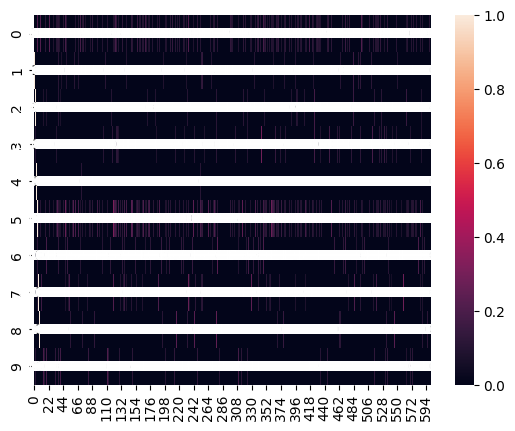

In [64]:
import seaborn as sns
sns.heatmap(cosine_similarity[0:10],annot=True)

In [66]:
dataset.head()

,title,link,year,authors,abstract
0,Bargaining Game Based Time Scheduling Scheme A...,/document/9615057/,2021,'Sungwook Kim',Backscatter communications have been acknowled...
1,Use Tangible User Interfaces K12 Education Set...,/document/9721879/,2022,"'José A. Gallud', 'Ricardo Tesoriero', 'Maria ...",Tangible User Interfaces have enriched and exp...
2,Transient Surface Charge Characteristics DC-GI...,/document/9714376/,2022,"'Xiaolong Li', 'Songling Han', 'Mingde Wan', '...",The insulator in direct current gas-insulated ...
3,Electromagnetic Vibration Characteristics Anal...,/document/8918234/,2019,"'Defeng Kong', 'Zhijun Shuai', 'Wanyou Li', 'D...",Electromagnetic vibration is an important exci...
4,kNN-STUFF: kNN STreaming Unit Fpgas,/document/8911384/,2019,"'João Vieira', 'Rui P. Duarte', 'Horácio C. Neto'",This paper presents kNN STreaming Unit For Fpg...


In [69]:
course_indices=pd.Series(dataset.index,index=dataset['title']).drop_duplicates()

In [70]:
course_indices

,0
title,
Bargaining Game Based Time Scheduling Scheme Ambient Backscatter Communications,0
Use Tangible User Interfaces K12 Education Settings: Systematic Mapping Study,1
Transient Surface Charge Characteristics DC-GIL Insulator Thermal-Electric Coupled Fields,2
Electromagnetic Vibration Characteristics Analysis Squirrel-Cage Induction Motor Different Loading Conditions,3
kNN-STUFF: kNN STreaming Unit Fpgas,4
...,...
Design 94GHz Dual-Polarization Antenna Fed Diagonal Horn Cloud Radars,596
Memory Storage Systems Utilizing Chaotic Attractor-Merging Bifurcation,597
NADS-RA: Network Anomaly Detection Scheme Based Feature Representation Data Augmentation,598


In [72]:
idx=course_indices['kNN-STUFF: kNN STreaming Unit Fpgas']

In [73]:
idx

4

In [74]:
scores=list(enumerate(cosine_similarity[idx]))

In [75]:
sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)

In [77]:
sorted_scores=sorted_scores[1:]

In [78]:
sorted_scores

[(72, 0.10660035817780521),
 (252, 0.10206207261596575),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81

In [81]:
vectorizer = CountVectorizer().fit_transform(dataset['title'].tolist() + [summary])

In [82]:
vectors = vectorizer.toarray()

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(vectors)

In [86]:
similarities = cosine_sim[-1][:-1]

In [88]:
similar_titles = dataset[similarities > 0]

In [89]:
if not similar_titles.empty:
    print("Similar Titles found:")
    for index, row in similar_titles.iterrows():
        print(f"- {row['title']}")
else:
    print("No similar titles found.")

Similar Titles found:
- Performing Image Classification Object Detection Convolutional Neural Networks Autonomous Driving Systems: Survey
- Neural Network Approach Program Synthesis Tabular Transformation Example
- Knowledge Enhanced Language Model Machine Reading Comprehension
- Transverse Flux Machine—A Review
- Dermatologist-Level Classification Skin Cancer Cascaded Ensembling Convolutional Neural Network Handcrafted Features Based Deep Neural Network
- Two-Dimensional RSSI-Based Indoor Localization Multiple Leaky Coaxial Cables Probabilistic Neural Network
- Machine Learning Deep Learning Approaches CyberSecurity: Review
- Robust Anomaly Detection Multivariate Data Spacecraft Recurrent Neural Networks Extreme Value Theory
- Machine Learning-Based Edge Computing Oriented Monitoring System Desert Border Surveillance Use Case
- Robust Network Intrusion Detection System Based Machine-Learning Early Classification
- Nondestructive Acoustic Testing Ceramic Capacitors One-Class Support Ve